Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=VTzOXazPkdM&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=8

# Sales Forecasting Using Machine Learning

Used resource:\
https://www.kaggle.com/c/rossmann-store-sales

In [61]:
import pandas as pd
import numpy as np
import warnings
import xgboost as xgb
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LassoCV,Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train_df=pd.read_csv('data/rossm_train_df.csv')
test_df=pd.read_csv('data/rossm_test_df.csv')

In [3]:
train_df.Date=pd.to_datetime(train_df.Date)
test_df.Date=pd.to_datetime(test_df.Date)

In [4]:
train_df.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,weekday,monthday,month,year,logSales,monthSales,logMonthSales
0,7,2014-12-31,5219,557,1.0,0.0,0,1.0,a,c,24000.0,2,31,12,2014,8.560253,223554.903226,12.317417
1,7,2014-12-30,10690,1177,1.0,0.0,0,1.0,a,c,24000.0,1,30,12,2014,9.277158,223554.903226,12.317417
2,7,2014-12-29,11145,1162,1.0,0.0,0,1.0,a,c,24000.0,0,29,12,2014,9.318836,223554.903226,12.317417
3,7,2014-12-28,0,0,0.0,0.0,0,0.0,a,c,24000.0,6,28,12,2014,0.000000,223554.903226,12.317417
4,7,2014-12-27,8882,917,1.0,0.0,0,0.0,a,c,24000.0,5,27,12,2014,9.091895,223554.903226,12.317417


In [5]:
numerical_features = ['Open', 'Promo','SchoolHoliday','logMonthSales','CompetitionDistance']
categorical_features = ['Store','StateHoliday','StoreType', 'Assortment','weekday', 'monthday', 'month']
target = 'logSales'

In [6]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_enc=enc.fit_transform(train_df[categorical_features])
test_enc=enc.transform(test_df[categorical_features])

In [7]:
train_enc[:10]

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [8]:
categorical_feat_enc=enc.get_feature_names_out(categorical_features)
categorical_feat_enc

array(['Store_7', 'Store_28', 'Store_44', 'Store_47', 'Store_62',
       'Store_65', 'Store_73', 'Store_77', 'Store_78', 'Store_80',
       'Store_93', 'Store_97', 'Store_102', 'Store_111', 'Store_118',
       'Store_131', 'Store_141', 'Store_146', 'Store_160', 'Store_173',
       'Store_175', 'Store_177', 'Store_182', 'Store_199', 'Store_222',
       'Store_238', 'Store_259', 'Store_270', 'Store_320', 'Store_321',
       'Store_324', 'Store_326', 'Store_327', 'Store_333', 'Store_344',
       'Store_350', 'Store_359', 'Store_364', 'Store_367', 'Store_378',
       'Store_421', 'Store_448', 'Store_452', 'Store_458', 'Store_474',
       'Store_480', 'Store_515', 'Store_521', 'Store_554', 'Store_568',
       'Store_583', 'Store_589', 'Store_607', 'Store_614', 'Store_625',
       'Store_626', 'Store_627', 'Store_645', 'Store_676', 'Store_681',
       'Store_689', 'Store_695', 'Store_732', 'Store_754', 'Store_756',
       'Store_758', 'Store_760', 'Store_762', 'Store_765', 'Store_784',
     

In [9]:
train_enc_df=pd.DataFrame(train_enc,columns=categorical_feat_enc)
test_enc_df=pd.DataFrame(test_enc,columns=categorical_feat_enc)

In [10]:
X_train_df=pd.concat([train_df[numerical_features], train_enc_df], axis=1)
X_test_df=pd.concat([test_df[numerical_features], test_enc_df], axis=1, ignore_index=True)

In [11]:
features=numerical_features+list(categorical_feat_enc)

In [12]:
features

['Open',
 'Promo',
 'SchoolHoliday',
 'logMonthSales',
 'CompetitionDistance',
 'Store_7',
 'Store_28',
 'Store_44',
 'Store_47',
 'Store_62',
 'Store_65',
 'Store_73',
 'Store_77',
 'Store_78',
 'Store_80',
 'Store_93',
 'Store_97',
 'Store_102',
 'Store_111',
 'Store_118',
 'Store_131',
 'Store_141',
 'Store_146',
 'Store_160',
 'Store_173',
 'Store_175',
 'Store_177',
 'Store_182',
 'Store_199',
 'Store_222',
 'Store_238',
 'Store_259',
 'Store_270',
 'Store_320',
 'Store_321',
 'Store_324',
 'Store_326',
 'Store_327',
 'Store_333',
 'Store_344',
 'Store_350',
 'Store_359',
 'Store_364',
 'Store_367',
 'Store_378',
 'Store_421',
 'Store_448',
 'Store_452',
 'Store_458',
 'Store_474',
 'Store_480',
 'Store_515',
 'Store_521',
 'Store_554',
 'Store_568',
 'Store_583',
 'Store_589',
 'Store_607',
 'Store_614',
 'Store_625',
 'Store_626',
 'Store_627',
 'Store_645',
 'Store_676',
 'Store_681',
 'Store_689',
 'Store_695',
 'Store_732',
 'Store_754',
 'Store_756',
 'Store_758',
 'Store_76

In [13]:
train_df.shape, train_enc_df.shape, X_train_df.shape

((73000, 18), (73000, 161), (73000, 166))

In [14]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = train_df[target].values
y_test = test_df[target].values

In [15]:
X_train

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [19]:
regr=RandomForestRegressor(n_estimators=100)

_=regr.fit(X_train,y_train)

train_df['pred_rf']=regr.predict(X_train)
test_df['pred_rf']=regr.predict(X_test)

train_rmse_rf=np.round(mean_squared_error(train_df[target], train_df['pred_rf'], squared=False),3)
test_rmse_rf=np.round(mean_squared_error(test_df[target], test_df['pred_rf'], squared=False),3)
train_rmse_rf, test_rmse_rf

(0.071, 0.167)

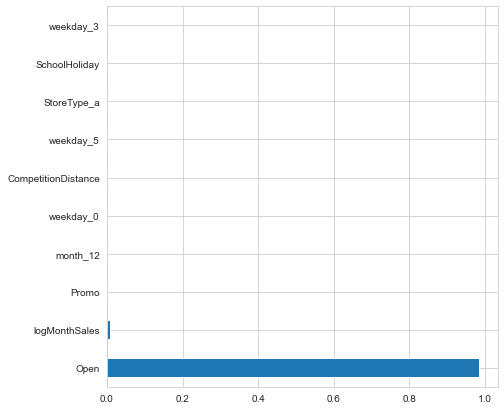

In [20]:
importances = regr.feature_importances_
df_importances=pd.Series(importances,index=features)
df_importances.sort_values(ascending=False, inplace=True)
df_importances[:10].plot(kind='barh',figsize=(7,7))
plt.show()

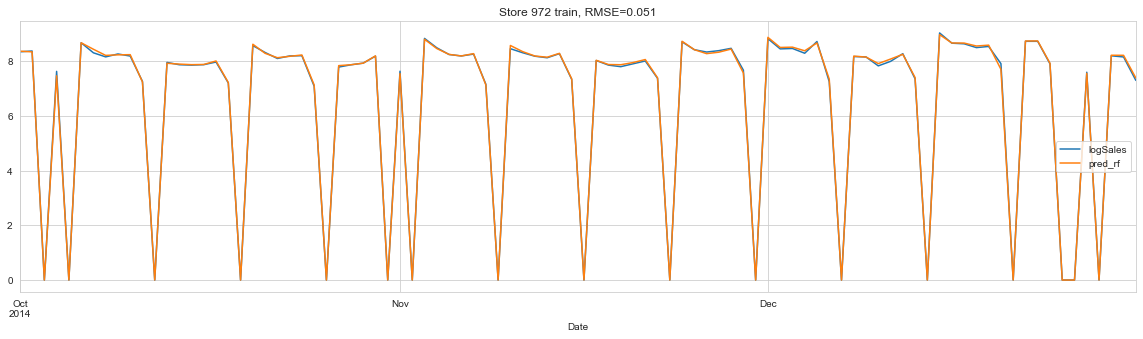

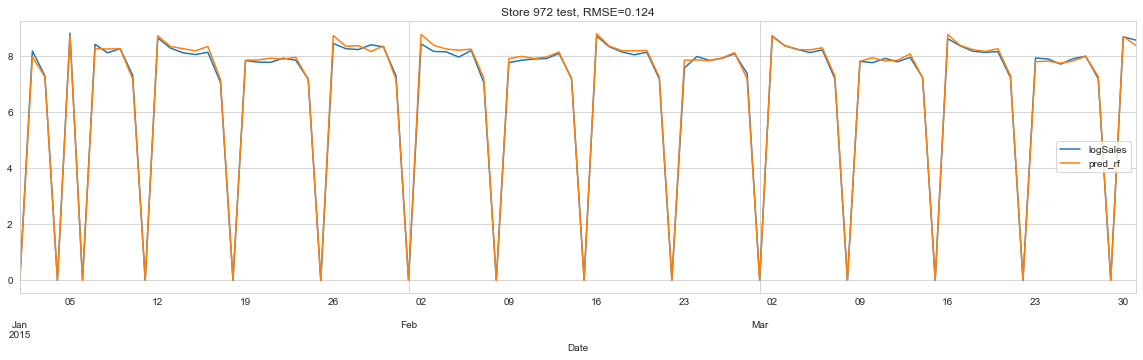

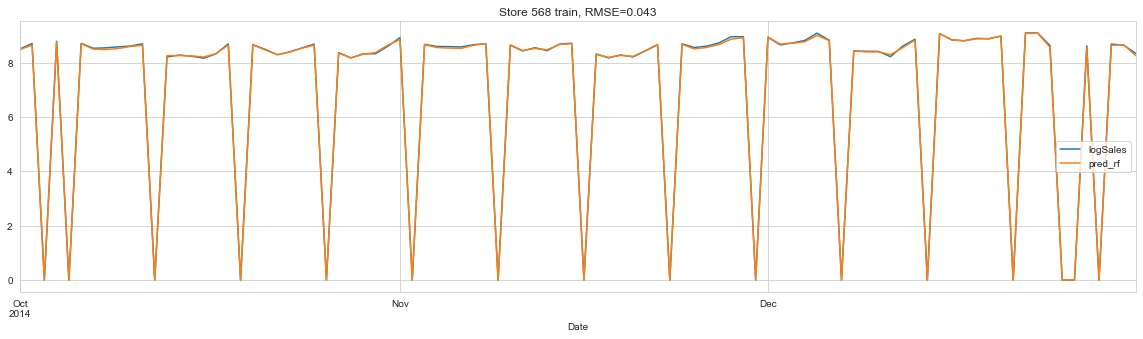

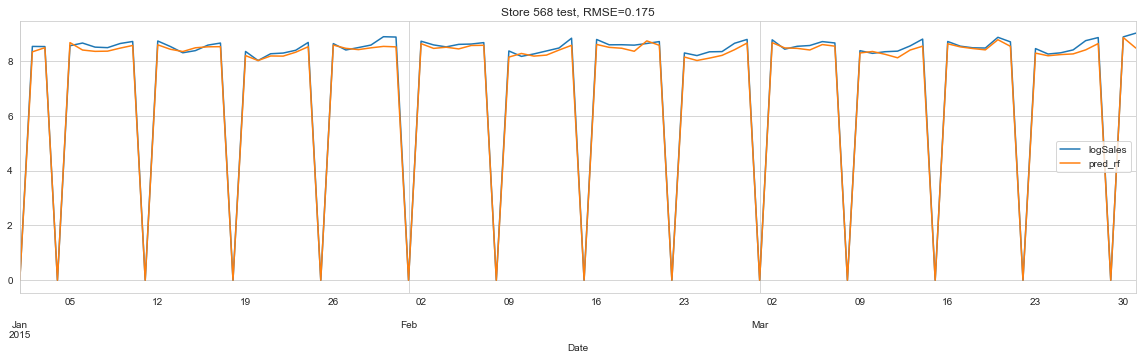

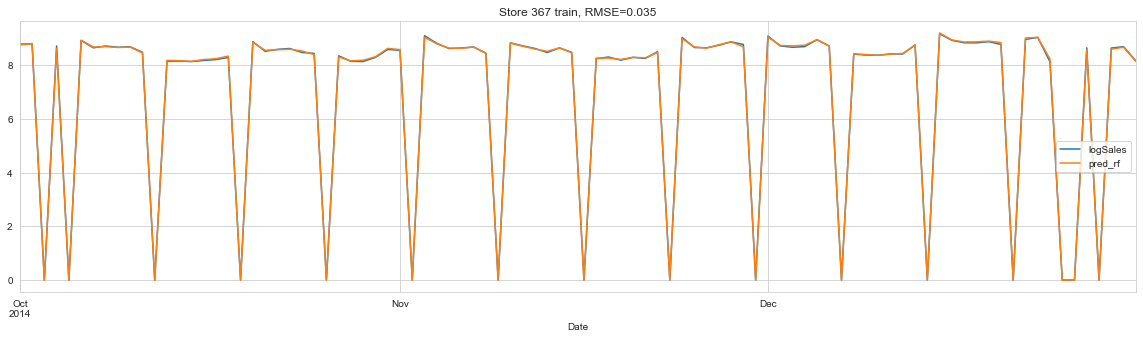

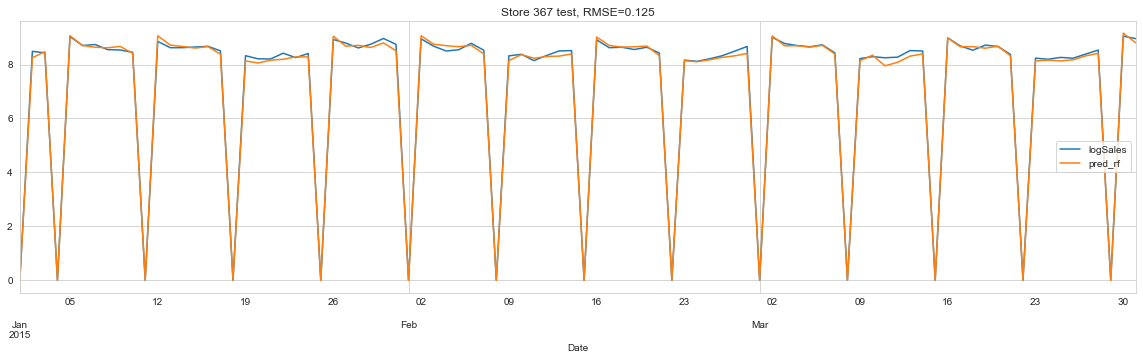

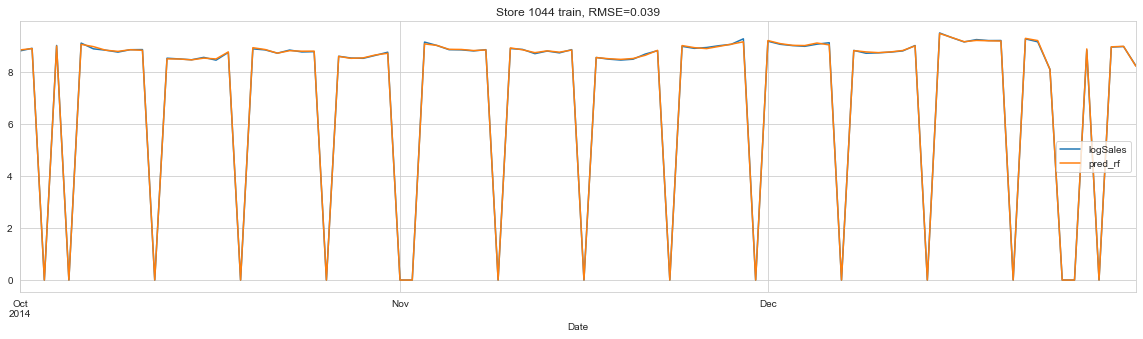

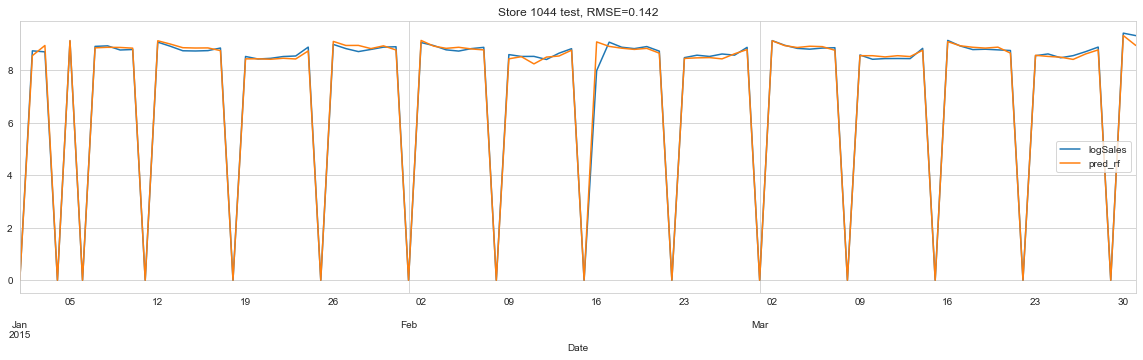

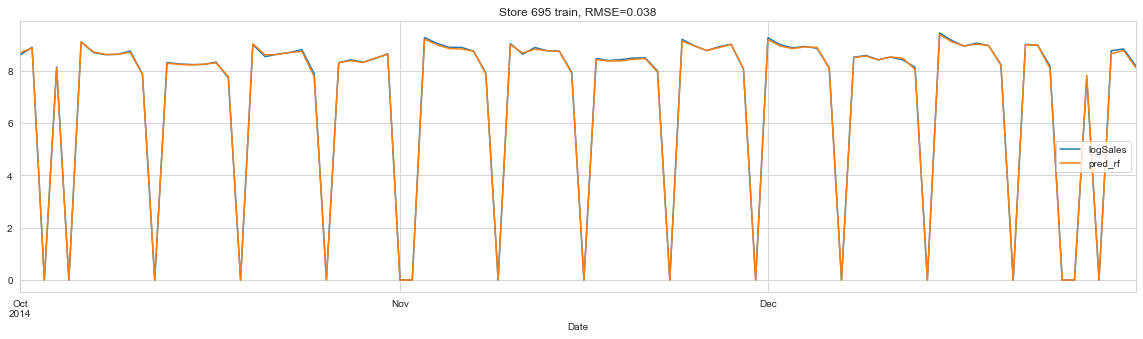

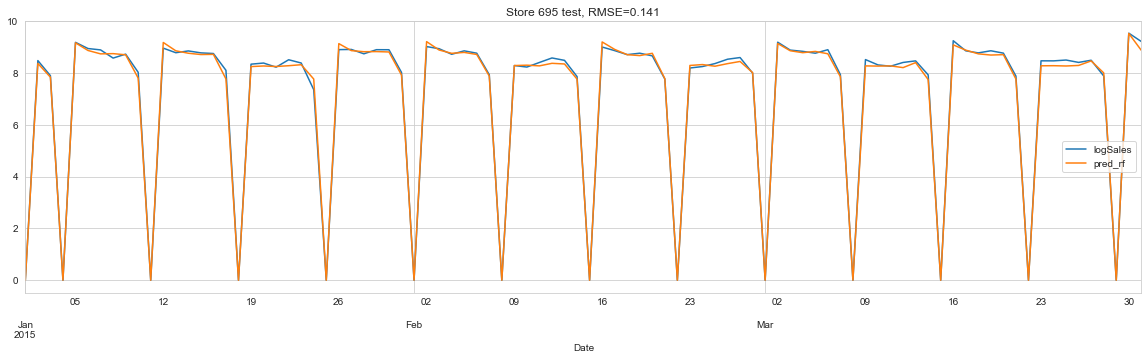

In [23]:
rand_stores=random.sample(train_df.Store.unique().tolist(), 5)

for i in rand_stores:
    #i=str(i)
    train_rmse=np.round(mean_squared_error(train_df[train_df.Store==i][target], \
                                  train_df[train_df.Store==i]['pred_rf'], squared=False),3)
    test_rmse=np.round(mean_squared_error(test_df[test_df.Store==i][target], \
                                 test_df[test_df.Store==i]['pred_rf'], squared=False),3)
    train_df[train_df.Store==i].set_index('Date')['2014-10':][[target,'pred_rf']]\
    .plot(title=f'Store {i} train, RMSE={train_rmse}',figsize=(20,5))
    plt.show()
    test_df[test_df.Store==i].set_index('Date')[:'2015-03'][[target,'pred_rf']]\
    .plot(title=f'Store {i} test, RMSE={test_rmse}', figsize=(20,5))
    plt.show()

In [24]:
params={'objective':'reg:squarederror',
'eta': 0.1, 
'max_depth':10,  
'subsample':0.85,  
'colsample_bytree':0.75, 
'eval_metric':'rmse'}

In [25]:
dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dm_train, 'train'), (dm_val, 'val')]
nrounds=500
regr = xgb.train(params, dm_train, nrounds, watchlist, early_stopping_rounds=500, 
                    verbose_eval=50)
pred = regr.predict(dm_val)

[0]	train-rmse:6.77355	val-rmse:6.81190
[50]	train-rmse:0.16539	val-rmse:0.17500
[100]	train-rmse:0.13167	val-rmse:0.15950
[150]	train-rmse:0.11061	val-rmse:0.16266
[200]	train-rmse:0.09761	val-rmse:0.16739
[250]	train-rmse:0.08949	val-rmse:0.16934
[300]	train-rmse:0.08250	val-rmse:0.17156
[350]	train-rmse:0.07725	val-rmse:0.17359
[400]	train-rmse:0.07297	val-rmse:0.17563
[450]	train-rmse:0.06964	val-rmse:0.17684
[499]	train-rmse:0.06671	val-rmse:0.17747


In [26]:
regr = XGBRegressor(**params, n_estimators=500,random_state=10)

In [27]:
_=regr.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test,y_test)], verbose=50)

[0]	validation_0-rmse:6.76979	validation_1-rmse:6.80573
[50]	validation_0-rmse:0.16820	validation_1-rmse:0.16369
[100]	validation_0-rmse:0.13334	validation_1-rmse:0.14870
[150]	validation_0-rmse:0.11234	validation_1-rmse:0.15171
[200]	validation_0-rmse:0.09643	validation_1-rmse:0.15711
[250]	validation_0-rmse:0.08791	validation_1-rmse:0.15983
[300]	validation_0-rmse:0.08125	validation_1-rmse:0.16227
[350]	validation_0-rmse:0.07603	validation_1-rmse:0.16435
[400]	validation_0-rmse:0.07233	validation_1-rmse:0.16576
[450]	validation_0-rmse:0.06886	validation_1-rmse:0.16683
[499]	validation_0-rmse:0.06599	validation_1-rmse:0.16811


In [28]:
eval_results = regr.evals_result()

eval_results_df=pd.DataFrame({'train':eval_results['validation_0']['rmse'],
                              'val':eval_results['validation_1']['rmse']})

eval_results_df.shape

(500, 2)

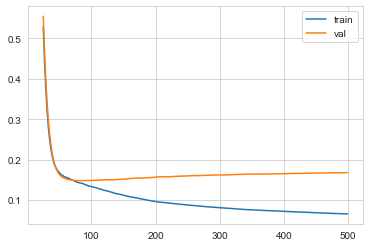

In [29]:
_=eval_results_df[25:].plot()

In [30]:
test_df['pred_xgb'] = regr.predict(X_test)

In [31]:
lightgbm_params = {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 15,
        'num_leaves': 100,  
        'max_depth': 5,  
        'learning_rate': 0.1,
        'bagging_fraction': 0.7, 
        'colsample_bytree': 0.7}
regr=LGBMRegressor(**lightgbm_params, n_estimators=1000)

_=regr.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test,y_test)], verbose=50)
test_df['pred_lgbm'] = regr.predict(X_test)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[50]	training's rmse: 0.222166	valid_1's rmse: 0.178491
[100]	training's rmse: 0.196929	valid_1's rmse: 0.157138
[150]	training's rmse: 0.189391	valid_1's rmse: 0.153385
[200]	training's rmse: 0.184688	valid_1's rmse: 0.151706
[250]	training's rmse: 0.181155	valid_1's rmse: 0.149842
[300]	training's rmse: 0.178126	valid_1's rmse: 0.148649
[350]	training's rmse: 0.175577	valid_1's rmse: 0.147935
[400]	training's rmse: 0.173616	valid_1's rmse: 0.147564
[450]	training's rmse: 0.172033	valid_1's rmse: 0.14716
[500]	training's rmse: 0.170021	valid_1's rmse: 0.146603
[550]	training's rmse: 0.168666	valid_1's rmse: 0.145871
[600]	training's rmse: 0.166735	valid_1's rmse: 0.146134
[650]	training's rmse: 0.165331	valid_1's rmse: 0.145959
[700]	training's rmse: 0.163372	valid_1's rmse: 0.145984
[750]	training's rmse: 0.162041	valid_1's rmse: 0.146442
[800]	training's rmse: 0.16059

In [32]:
X_train.shape

(73000, 166)

In [34]:
le=LabelEncoder()
train_df['StoreType_enc']=le.fit_transform(train_df['StoreType'])
test_df['StoreType_enc']=le.transform(test_df['StoreType'])

le=LabelEncoder()
train_df['Assortment_enc']=le.fit_transform(train_df['Assortment'])
test_df['Assortment_enc']=le.transform(test_df['Assortment'])

le=LabelEncoder()
train_df['StateHoliday_enc']=le.fit_transform(train_df['StateHoliday'])
test_df['StateHoliday_enc']=le.transform(test_df['StateHoliday'])

In [35]:
lightgbm_features = ['Open', 'Promo', 'SchoolHoliday', 'logMonthSales', 'CompetitionDistance', 'Store',
                     'weekday', 'monthday', 'month', 'StateHoliday_enc', 'StoreType_enc', 'Assortment_enc']

In [37]:
X_train1=train_df[lightgbm_features].values
X_test1=test_df[lightgbm_features].values
X_train1.shape

(73000, 12)

In [115]:
X_train1

array([[1., 0., 1., ..., 0., 0., 2.],
       [1., 0., 1., ..., 0., 0., 2.],
       [1., 0., 1., ..., 0., 0., 2.],
       ...,
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.]])

In [38]:
lightgbm_params = {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 15,
        'num_leaves': 100,  
        'max_depth': 4,  
        'learning_rate': 0.1,
        'bagging_fraction': 0.7, 
        'colsample_bytree': 0.7}
regr=LGBMRegressor(**lightgbm_params, n_estimators=1000)
_=regr.fit(X_train1, y_train, eval_set = [(X_train1, y_train), (X_test1,y_test)], verbose=50)
test_df['pred_lgbm1'] = regr.predict(X_test1)

[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[50]	training's rmse: 0.242254	valid_1's rmse: 0.190875
[100]	training's rmse: 0.20896	valid_1's rmse: 0.16442
[150]	training's rmse: 0.199913	valid_1's rmse: 0.158313
[200]	training's rmse: 0.194597	valid_1's rmse: 0.155134
[250]	training's rmse: 0.191019	valid_1's rmse: 0.152671
[300]	training's rmse: 0.187616	valid_1's rmse: 0.150523
[350]	training's rmse: 0.185117	valid_1's rmse: 0.149247
[400]	training's rmse: 0.183096	valid_1's rmse: 0.149147
[450]	training's rmse: 0.181366	valid_1's rmse: 0.147935
[500]	training's rmse: 0.180013	valid_1's rmse: 0.147342
[550]	training's rmse: 0.17896	valid_1's rmse: 0.14723
[600]	training's rmse: 0.177962	valid_1's rmse: 0.146843
[650]	training's rmse: 0.177024	valid_1's rmse: 0.14681
[700]	training's rmse: 0.176141	valid_1's rmse: 0.146357
[750]	training's rmse: 0.17493	valid_1's rmse: 0.146032
[800]	training's rmse: 0.173984	val

In [124]:
test_df['pred_lgbm1']

0        9.545963
1        9.341291
2        9.216893
3        9.281750
4        9.411770
           ...   
21195    9.220291
21196    9.243186
21197    8.850259
21198    9.031401
21199    8.856870
Name: pred_lgbm1, Length: 21200, dtype: float64

In [39]:
xscaler = StandardScaler()
X_train_st=xscaler.fit_transform(X_train)
X_test_st=xscaler.transform(X_test)

In [40]:
y_train.reshape(-1, 1)

array([[8.56025268],
       [9.27715755],
       [9.31883597],
       ...,
       [8.86135011],
       [8.80821967],
       [8.69316127]])

In [41]:
yscaler = StandardScaler()
y_train_st=yscaler.fit_transform(y_train.reshape(-1, 1) )
y_test_st=yscaler.transform(y_test.reshape(-1, 1))

In [42]:
input_dim = X_train_st.shape[1]

In [43]:
input_dim

166

In [44]:
model = Sequential()
model.add(Dense(1024, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.0001))

Metal device set to: Apple M1 Pro


2023-02-08 17:30:19.559865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-08 17:30:19.560316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              171008    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 696,321
Trainable params: 696,321
Non-trainable params: 0
_________________________________________________________________


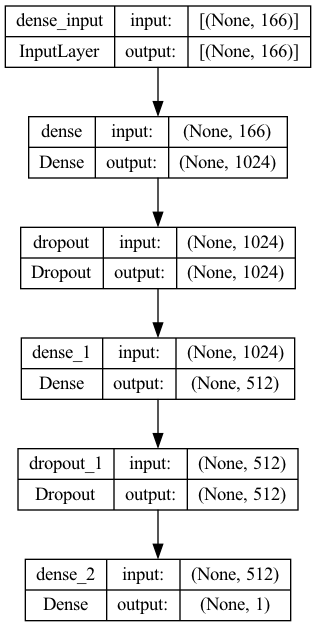

In [46]:
tf.keras.utils.plot_model(model, to_file='img.png', show_shapes=True, show_layer_names=True)

In [47]:
hist = model.fit(X_train_st, y_train_st, batch_size=512, epochs=25, \
                 validation_data=(X_test_st, y_test_st))

Epoch 1/25


2023-02-08 17:30:47.912864: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-08 17:30:48.127070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 2s 10ms/step - loss: 0.3014 - val_loss: 0.1191
Epoch 2/25
 10/143 [=>............................] - ETA: 0s - loss: 0.1700

2023-02-08 17:30:49.863707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 1s 9ms/step - loss: 0.1482 - val_loss: 0.0890
Epoch 3/25
143/143 [==============================] - 1s 9ms/step - loss: 0.1137 - val_loss: 0.0711
Epoch 4/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0955 - val_loss: 0.0696
Epoch 5/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0844 - val_loss: 0.0608
Epoch 6/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0771 - val_loss: 0.0601
Epoch 7/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0717 - val_loss: 0.0533
Epoch 8/25
143/143 [==============================] - 1s 8ms/step - loss: 0.0673 - val_loss: 0.0561
Epoch 9/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0639 - val_loss: 0.0516
Epoch 10/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0612 - val_loss: 0.0508
Epoch 11/25
143/143 [==============================] - 1s 9ms/step - loss: 0.0586 - val_loss: 0.0491
Epoch 12/

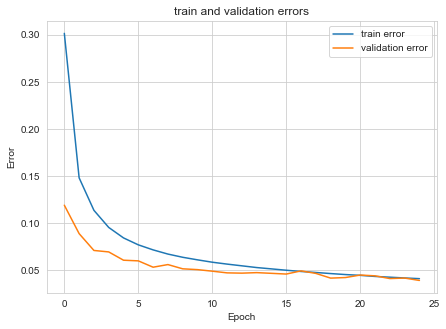

In [48]:
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('train and validation errors')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['train error', 'validation error'], loc='upper right')
plt.show()

In [49]:
pred = model.predict(X_train_st)
pred=yscaler.inverse_transform(pred)
train_df['pred_nn']=pred

pred = model.predict(X_test_st)
pred=yscaler.inverse_transform(pred)
test_df['pred_nn']=pred

  58/2282 [..............................] - ETA: 3s

2023-02-08 17:34:17.363041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


663/663 [==============================] - 1s 2ms/step


In [51]:
train_rmse_nn=np.round(mean_squared_error(train_df[target], train_df['pred_nn'], squared=False),3)
test_rmse_nn=np.round(mean_squared_error(test_df[target], test_df['pred_nn'], squared=False),3)
print(f'Train RMSE:{train_rmse_nn}, Test RMSE:{test_rmse_nn}')

Train RMSE:0.254, Test RMSE:0.189


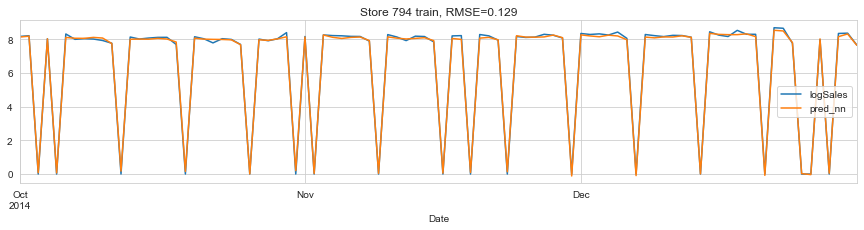

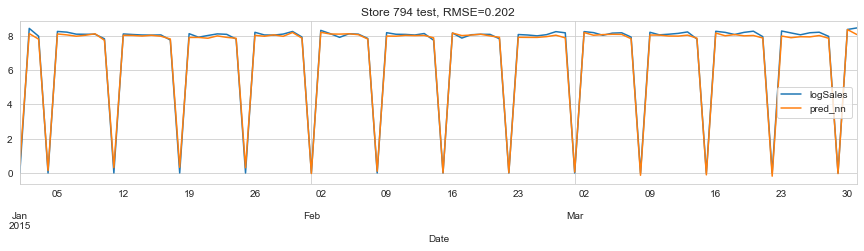

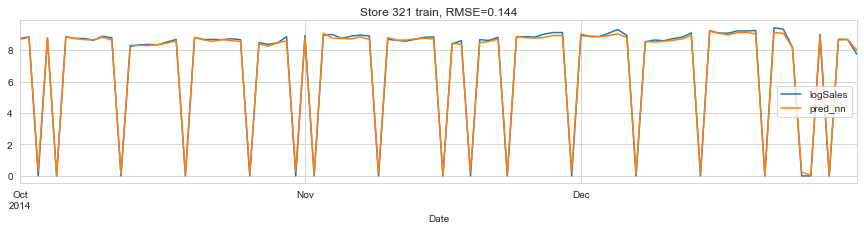

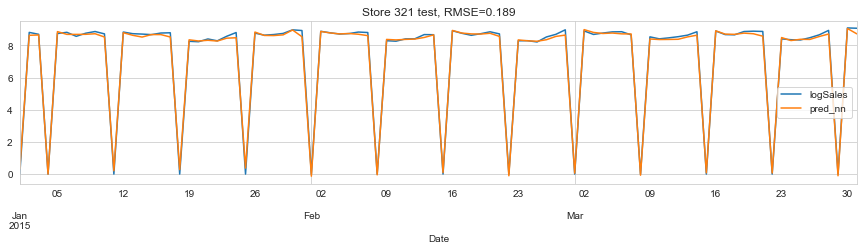

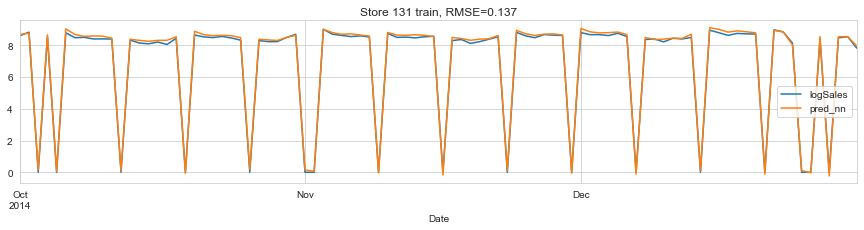

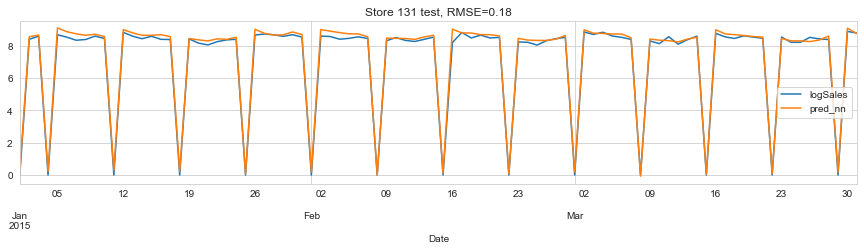

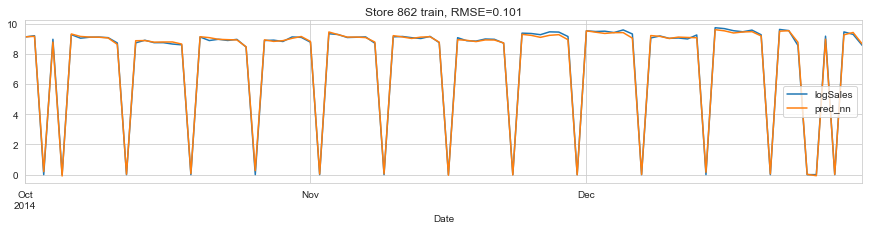

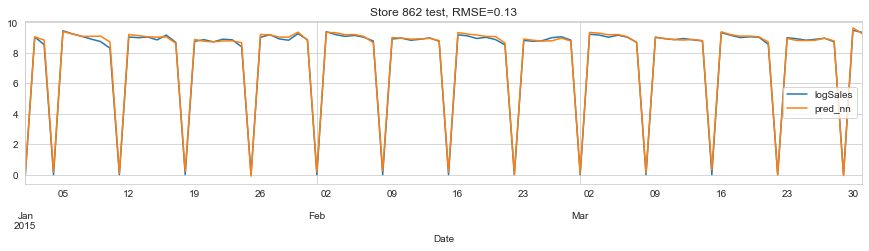

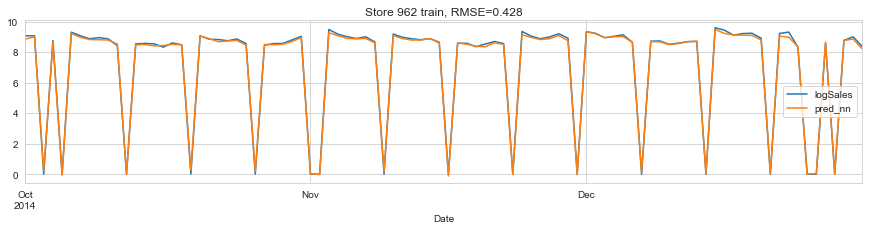

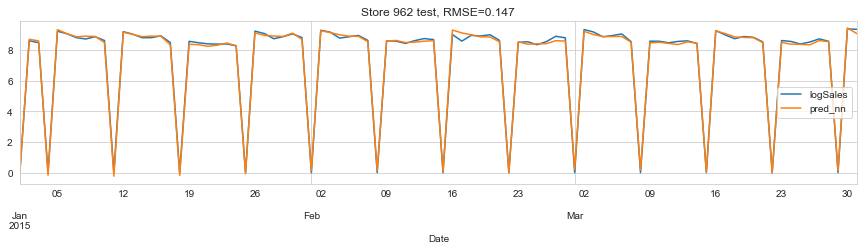

In [52]:
rand_stores=random.sample(train_df.Store.unique().tolist(), 5)

for i in rand_stores:
    #i=str(i)
    train_rmse=np.round(mean_squared_error(train_df[train_df.Store==i][target], \
                                  train_df[train_df.Store==i]['pred_nn'], squared=False),3)
    test_rmse=np.round(mean_squared_error(test_df[test_df.Store==i][target], \
                                 test_df[test_df.Store==i]['pred_nn'], squared=False),3)
    train_df[train_df.Store==i].set_index('Date')['2014-10':][[target,'pred_nn']]\
    .plot(title=f'Store {i} train, RMSE={train_rmse}',figsize=(15,3))
    plt.show()
    test_df[test_df.Store==i].set_index('Date')[:'2015-03'][[target,'pred_nn']]\
    .plot(title=f'Store {i} test, RMSE={test_rmse}', figsize=(15,3))
    plt.show()

In [53]:
features_nn = ['Store','logMonthSales', 'StateHoliday_enc','StoreType_enc', 
               'Assortment_enc','weekday', 'monthday', 'month', 'Open', 'Promo',
               'SchoolHoliday','CompetitionDistance']

xscaler = StandardScaler()
X_train_st=xscaler.fit_transform(train_df[features_nn].values)
X_test_st=xscaler.transform(test_df[features_nn].values)

yscaler = StandardScaler()
y_train_st=yscaler.fit_transform(train_df[['logSales']].values )
y_test_st=yscaler.transform(test_df[['logSales']])

input_dim = X_train_st.shape[1]

In [54]:
input_dim

12

Epoch 1/15
  1/143 [..............................] - ETA: 1:04 - loss: 0.7088

2023-02-08 17:38:27.475173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - ETA: 0s - loss: 0.2012

2023-02-08 17:38:30.609599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 4s 23ms/step - loss: 0.2012 - val_loss: 0.0485
Epoch 2/15
143/143 [==============================] - 3s 22ms/step - loss: 0.0518 - val_loss: 0.0452
Epoch 3/15
143/143 [==============================] - 3s 23ms/step - loss: 0.0465 - val_loss: 0.0368
Epoch 4/15
143/143 [==============================] - 3s 22ms/step - loss: 0.0437 - val_loss: 0.0410
Epoch 5/15
143/143 [==============================] - 3s 23ms/step - loss: 0.0417 - val_loss: 0.0386
Epoch 6/15
143/143 [==============================] - 3s 22ms/step - loss: 0.0407 - val_loss: 0.0353
Epoch 7/15
143/143 [==============================] - 3s 23ms/step - loss: 0.0393 - val_loss: 0.0416
Epoch 8/15
143/143 [==============================] - 3s 22ms/step - loss: 0.0385 - val_loss: 0.0349
Epoch 9/15
143/143 [==============================] - 3s 22ms/step - loss: 0.0380 - val_loss: 0.0377
Epoch 10/15
143/143 [==============================] - 3s 23ms/step - loss: 0.0373 - val_loss: 0.0351


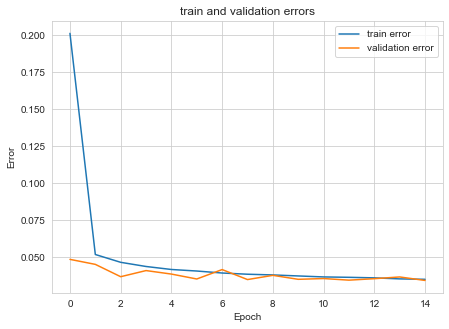

  45/2282 [..............................] - ETA: 7s

2023-02-08 17:39:15.922093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


663/663 [==============================] - 1s 2ms/step
Train RMSE:0.202, Test RMSE:0.155


In [55]:
model = Sequential()
model.add(Dense(4096, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.000015))

hist = model.fit(X_train_st, y_train_st, batch_size=512, epochs=15, \
                 validation_data=(X_test_st, y_test_st))

fig, ax = plt.subplots(figsize=(7,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('train and validation errors')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['train error', 'validation error'], loc='upper right')
plt.show()

pred = model.predict(X_train_st)
pred=yscaler.inverse_transform(pred)
train_df['pred_nn1']=pred

pred = model.predict(X_test_st)
pred=yscaler.inverse_transform(pred)
test_df['pred_nn1']=pred

train_rmse_nn=np.round(mean_squared_error(train_df[target], train_df['pred_nn1'], squared=False),3)
test_rmse_nn=np.round(mean_squared_error(test_df[target], test_df['pred_nn1'], squared=False),3)
print(f'Train RMSE:{train_rmse_nn}, Test RMSE:{test_rmse_nn}')

In [56]:
pred_col_list=['pred_rf','pred_xgb', 'pred_lgbm', 'pred_lgbm1', 'pred_nn', 'pred_nn1']
test_df[pred_col_list+[target]]

,pred_rf,pred_xgb,pred_lgbm,pred_lgbm1,pred_nn,pred_nn1,logSales
0,9.494895,9.535498,9.449394,9.545963,9.491391,9.482317,9.638545
1,9.281905,9.218104,9.286842,9.341291,9.325451,9.213044,9.355393
2,9.182226,9.191579,9.158215,9.216893,9.210292,9.158422,9.398892
3,9.278897,9.229141,9.213803,9.281750,9.202190,9.171510,9.420844
4,9.477174,9.360812,9.349169,9.411770,9.367532,9.269064,9.607101
...,...,...,...,...,...,...,...
21195,9.203010,9.151401,9.129968,9.220291,9.096433,9.350228,9.311994
21196,9.215715,9.181868,9.191245,9.243186,9.091367,9.195440,9.392078
21197,8.815736,8.820115,8.836178,8.850259,8.824530,9.149287,8.829812
21198,8.889853,8.969353,9.045764,9.031401,9.022297,9.045262,8.925587


In [57]:
test_df.Date.min(), test_df.Date.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [58]:
date_val_test_split='2015-04-01'
val_d = test_df.loc[test_df.Date < date_val_test_split,pred_col_list+[target]]
test_d = test_df.loc[test_df.Date >= date_val_test_split,pred_col_list+[target]]

In [63]:
for i in pred_col_list:
    val_rmse=np.round(mean_squared_error(val_d[target], val_d[i], squared=False),3)
    test_rmse=np.round(mean_squared_error(test_d[target], test_d[i], squared=False),3)
    print(f'{i}: Val RMSE:{val_rmse}, Test RMSE:{test_rmse}')

pred_rf: Val RMSE:0.156, Test RMSE:0.174
pred_xgb: Val RMSE:0.155, Test RMSE:0.177
pred_lgbm: Val RMSE:0.147, Test RMSE:0.148
pred_lgbm1: Val RMSE:0.148, Test RMSE:0.144
pred_nn: Val RMSE:0.195, Test RMSE:0.184
pred_nn1: Val RMSE:0.146, Test RMSE:0.161


In [64]:
rmse_df=pd.DataFrame()
for i in pred_col_list:
    lr=LinearRegression()
    _=lr.fit(val_d[[i]].values,val_d[target].values)
    pred_val_corr=lr.predict(val_d[[i]].values)
    pred_test_corr=lr.predict(test_d[[i]].values)
    val_rmse=np.round(mean_squared_error(val_d[target], val_d[i], squared=False),3)
    val_rmse_corr=np.round(mean_squared_error(val_d[target], pred_val_corr, squared=False),3)
    test_rmse=np.round(mean_squared_error(test_d[target], test_d[i], squared=False),3)
    test_rmse_corr=np.round(mean_squared_error(test_d[target], pred_test_corr, squared=False),3)
    rmse_df.loc[i,'val_rmse']=val_rmse
    rmse_df.loc[i,'val_rmse_corr']=val_rmse_corr
    rmse_df.loc[i,'test_rmse']=test_rmse
    rmse_df.loc[i,'test_rmse_corr']=test_rmse_corr
display(rmse_df)

,val_rmse,val_rmse_corr,test_rmse,test_rmse_corr
pred_rf,0.156,0.154,0.174,0.169
pred_xgb,0.155,0.153,0.177,0.171
pred_lgbm,0.147,0.144,0.148,0.140
pred_lgbm1,0.148,0.147,0.144,0.138
pred_nn,0.195,0.193,0.184,0.175
pred_nn1,0.146,0.144,0.161,0.153


<AxesSubplot:>

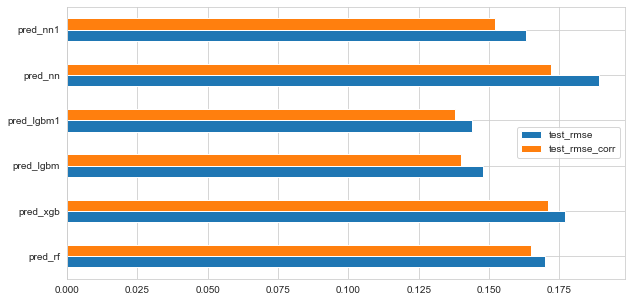

In [147]:
_=rmse_df[['test_rmse','test_rmse_corr']].plot(kind='barh',figsize=(10,5))

In [157]:
lr=LinearRegression()
_=lr.fit(val_d[pred_col_list].values,val_d[target].values)
pred_val_stacking=lr.predict(val_d[pred_col_list].values)
pred_test_stacking=lr.predict(test_d[pred_col_list].values)
val_rmse_stacking=np.round(mean_squared_error(val_d[target], pred_val_stacking, squared=False),3)
test_rmse_stacking=np.round(mean_squared_error(test_d[target], pred_test_stacking, squared=False),3)
rmse_df.loc['stacking','val_rmse']=val_rmse_stacking
rmse_df.loc['stacking','test_rmse']=test_rmse_stacking
display(rmse_df[['val_rmse','test_rmse']])

,val_rmse,test_rmse
pred_rf,0.154,0.170
pred_xgb,0.155,0.177
pred_lgbm,0.147,0.148
pred_lgbm1,0.148,0.144
pred_nn,0.200,0.189
pred_nn1,0.147,0.163
stacking,0.131,0.137


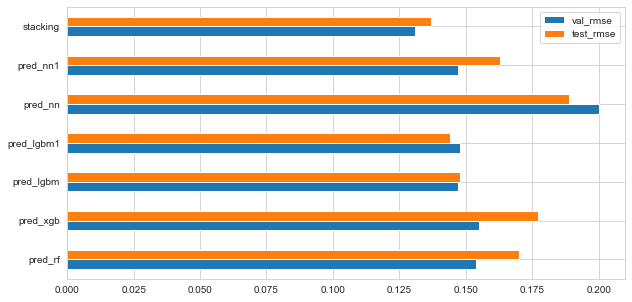

In [158]:
_=rmse_df[['val_rmse','test_rmse']].plot(kind='barh',figsize=(10,5))